In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("BreastCancerData.csv")

In [93]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [94]:
df.shape

(569, 33)

In [95]:
# df = df.rename({"Unnamed: 32":"a"}, axis=1, inplace=True)
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [96]:
df.shape

(569, 31)

In [72]:
from sklearn.model_selection import train_test_split

In [97]:
Y = df['diagnosis']
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [102]:
X = df.iloc[:, 1:].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [103]:
df.isnull().any().any()

False

In [104]:
# l = list(df.columns)
# for i in l:
#     print(i),
#     df[df[i].isnull()].index.tolist()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [106]:
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [111]:
y_pred = classifier.predict(x_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.958041958041958
[[85  2]
 [ 4 52]]
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        87
           M       0.96      0.93      0.95        56

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [113]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))   

Text(0, 0.5, 'Mean Error')

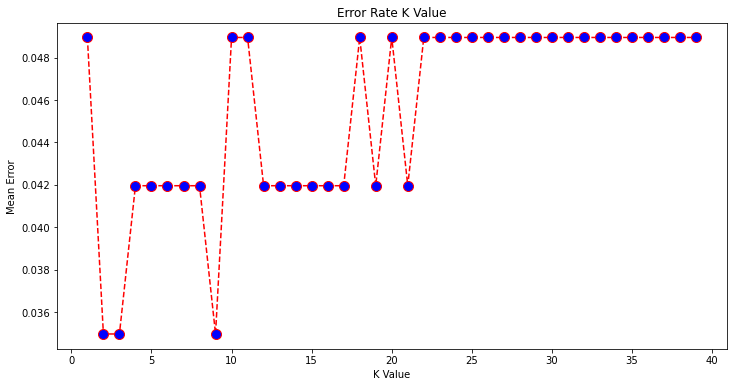

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [117]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.965034965034965
[[86  1]
 [ 4 52]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        87
           M       0.98      0.93      0.95        56

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [124]:
param = {
    'n_neighbors': list(range(1, 20)),
    'p': [1,2,3,4,5,6,7,8],
}

In [125]:
from sklearn.model_selection import GridSearchCV

knn_obj = KNeighborsClassifier()

knn_obj = GridSearchCV(knn_obj, param, cv=6)

knn_obj.fit(x_train, y_train)

y_pred = knn_obj.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(knn_obj.best_params_)
print(knn_obj.best_score_)

0.965034965034965
[[86  1]
 [ 4 52]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        87
           M       0.98      0.93      0.95        56

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

{'n_neighbors': 9, 'p': 2}
0.9694835680751175
